First step of any data analysis problem is to import necessary modules. pandas is for csv hadling while seaborn is for visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head(5)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

Below command shows wethher or not a null value is present in the model

In [9]:
df.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

df['m13'].sum()/df['m13'].count()

This indicates the it is highly unbalanced class where just 0.5% of the samples is positive. This can be further eveluated with graph

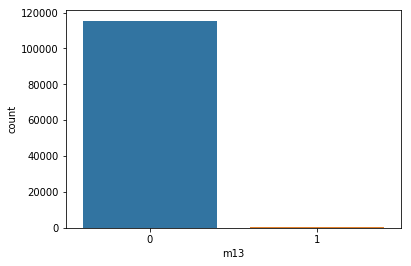

In [7]:
sns.countplot('m13',data=df)
plt.show()

As this is highly imbalanced class we can thin of using adaboost or assign class weights to get better result.
In the imabalanced class accuracy does not give idea about the model performance as true negative will ne very high in the model.
For such problem accurate prediction of true positive  is our major cocern. F1 or ROC Curve will be used for the evaluation

Seletion of Preprocessing tool from problem 

In [8]:
def conv(a):
    return(int(re.findall("\d+", a)[1]))
def conv1(a):
    return(int(re.findall("\d+", a)[0]))
def preprocessing(df_ana):
    df_ana['od']=df_ana['origination_date'].apply(conv)
    df_ana['fd']=df_ana['origination_date'].apply(conv)
    df_ana.drop('loan_id',inplace=True,axis=1)
    df_ana.drop('origination_date',inplace=True,axis=1)
    df_ana.drop('first_payment_date',inplace=True,axis=1)
    return(df_ana)

In [10]:
import re
df=pd.read_csv('train.csv')
df_ana=preprocessing(df)
X=df_ana.drop('m13',axis=1)
y=df['m13']
X=pd.get_dummies(X)

First set up a base ROC and compare other preprocessing techniques like:-
random oversampling
random undersampling
smotte
adasyn

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
clf = DecisionTreeClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
y_pred_1 = clf.predict(X_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[34494   139]
 [  125    60]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     34633
          1       0.30      0.32      0.31       185

avg / total       0.99      0.99      0.99     34818

0.6601554056005013


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
clf = DecisionTreeClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
y_pred_1 = clf.predict(X_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[34501   132]
 [  127    58]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     34633
          1       0.31      0.31      0.31       185

avg / total       0.99      0.99      0.99     34818

0.6548510598780571


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from imblearn.under_sampling import ClusterCentroids
ros = ClusterCentroids(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
clf = DecisionTreeClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
y_pred_1 = clf.predict(X_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[  831 33802]
 [    5   180]]
             precision    recall  f1-score   support

          0       0.99      0.02      0.05     34633
          1       0.01      0.97      0.01       185

avg / total       0.99      0.03      0.05     34818

0.49848371456375384


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=0,ratio=1)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
clf = DecisionTreeClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
y_pred_1 = clf.predict(X_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


[[34463   170]
 [  121    64]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     34633
          1       0.27      0.35      0.31       185

avg / total       0.99      0.99      0.99     34818

0.670518666386769


In [23]:
y_test.sum()

160

In [51]:
from sklearn.preprocessing import StandardScaler
stdSc = StandardScaler()
num_col=df_ana.drop('m13',axis=1).select_dtypes(exclude='object').columns
X_train[num_col] = stdSc.fit_transform(X_train[num_col])
X_test[num_col] = stdSc.transform(X_test[num_col])
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=0,ratio=1)
X_resampled, y_resampled = ros.fit_sample(X_train_scale, y_train)
clf = DecisionTreeClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test_scale)
y_pred_1 = clf.predict(X_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alekh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

[[28588   267]
 [   96    64]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     28855
          1       0.19      0.40      0.26       160

avg / total       0.99      0.99      0.99     29015

0.695373418818229


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from imblearn.over_sampling import ADASYN
ros = ADASYN(random_state=0,ratio=1)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
clf = DecisionTreeClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
y_pred_1 = clf.predict(X_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


[[28712   143]
 [  105    55]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28855
          1       0.28      0.34      0.31       160

avg / total       0.99      0.99      0.99     29015

0.6693970932247444


In [53]:
from sklearn.preprocessing import StandardScaler
stdSc = StandardScaler()
num_col=df_ana.drop('m13',axis=1).select_dtypes(exclude='object').columns
X_train[num_col] = stdSc.fit_transform(X_train[num_col])
X_test[num_col] = stdSc.transform(X_test[num_col])
from imblearn.over_sampling import ADASYN
ros = ADASYN(random_state=0,ratio=1)
X_resampled, y_resampled = ros.fit_sample(X_train_scale, y_train)
clf = DecisionTreeClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test_scale)
y_pred_1 = clf.predict(X_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alekh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

[[28596   259]
 [  105    55]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     28855
          1       0.18      0.34      0.23       160

avg / total       0.99      0.99      0.99     29015

0.667387042973488


So according to this analysis I have selected smotte